In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
register_matplotlib_converters()
import calendar

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
#df = pd.read_csv('fcc-forum-pageviews.csv')

url= 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv'
df= pd.read_csv(url)

# Clean data
df = df[df['value'] <= df['value'].quantile(0.975)]


def draw_line_plot():
    # Draw line plot
    # Filter data between two dates
    df['date'] = pd.to_datetime(df['date'])
    start_date = '2016-05-01'
    end_date = '2019-12-31'
    date_filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    # Create the plot
    plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
    plt.plot(date_filtered_df['date'], date_filtered_df['value'], marker=',', linestyle='-')
    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    # Display the plot
    plt.grid(False)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.show()
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None
    # Extract year and month from the 'date' column
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    # Group by year and month, and calculate the average daily views
    average_views = df.groupby(['year', 'month'])['value'].mean().unstack()
    # Create the bar plot
    plt.figure(figsize=(30, 20))
    average_views.plot(kind='bar', stacked=False)
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.title('Average Daily Views by Month, Grouped by Year')
    plt.xticks(rotation=45)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    # Customize legend labels based on months
    months = [calendar.month_name[i] for i in range(1, 13)]
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_labels = {label: month for label, month in zip(labels, months)}
    # Create legend with custom labels
    plt.legend(handles, [legend_labels[label] for label in labels], title='Month', bbox_to_anchor=(1.05, 0.5), loc='center left')
    plt.tight_layout()
    plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():

    # Extract year and month from the 'date' column
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month_name()

    # Set the order of months for plotting
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Year-wise box plot
    sns.boxplot(x='year', y='value', data=df, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise box plot
    sns.boxplot(x='month', y='value', data=df, ax=axes[1], order=month_order)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Rotate the x-axis labels for month-wise box plot
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


#### For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth. ####

Use the data to complete the following tasks:

1) Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
2) Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
3) Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
4) Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
5) Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
register_matplotlib_converters()

In [3]:
#df = pd.read_csv('fcc-forum-pageviews')
url= 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv'
df= pd.read_csv(url)

In [4]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [5]:
df = df[df['value'] <= df['value'].quantile(0.975)] # discard top 2.5% quantile values

In [6]:
# Filter data between two dates
df['date'] = pd.to_datetime(df['date'])
start_date = '2016-05-01'
end_date = '2019-12-31'
date_filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]


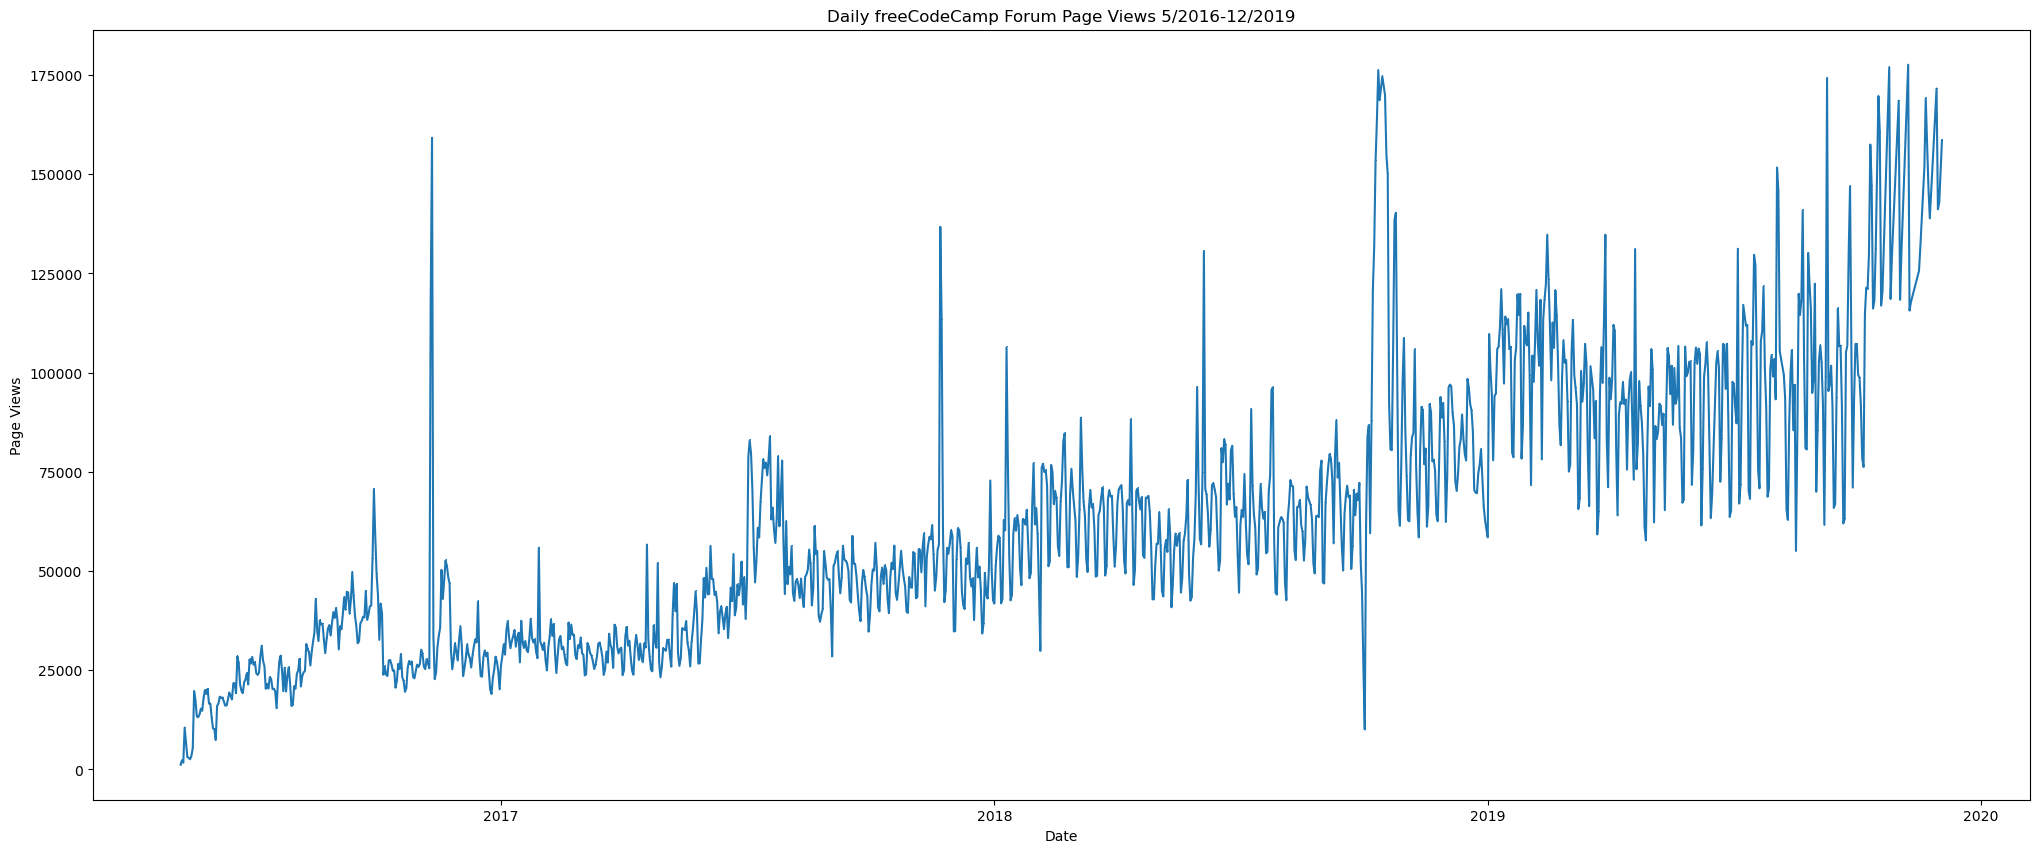

In [7]:
# Create the plot
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(date_filtered_df['date'], date_filtered_df['value'], marker=',', linestyle='-')
# Set labels and title
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
# Display the plot
plt.grid(False)  # Add grid for better visualization
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()


<Figure size 3000x2000 with 0 Axes>

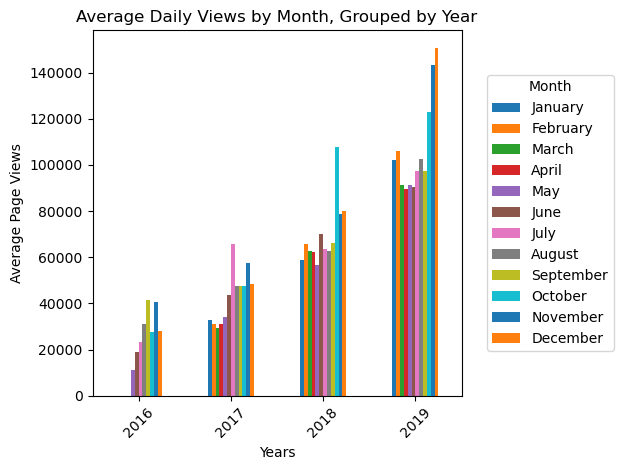

In [15]:
# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, and calculate the average daily views
average_views = df.groupby(['year', 'month'])['value'].mean().unstack()
import calendar
# Create the bar plot
plt.figure(figsize=(30, 20))
average_views.plot(kind='bar', stacked=False)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.title('Average Daily Views by Month, Grouped by Year')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize legend labels based on months
months = [calendar.month_name[i] for i in range(1, 13)]
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = {label: month for label, month in zip(labels, months)}

# Create legend with custom labels
plt.legend(handles, [legend_labels[label] for label in labels], title='Month', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()



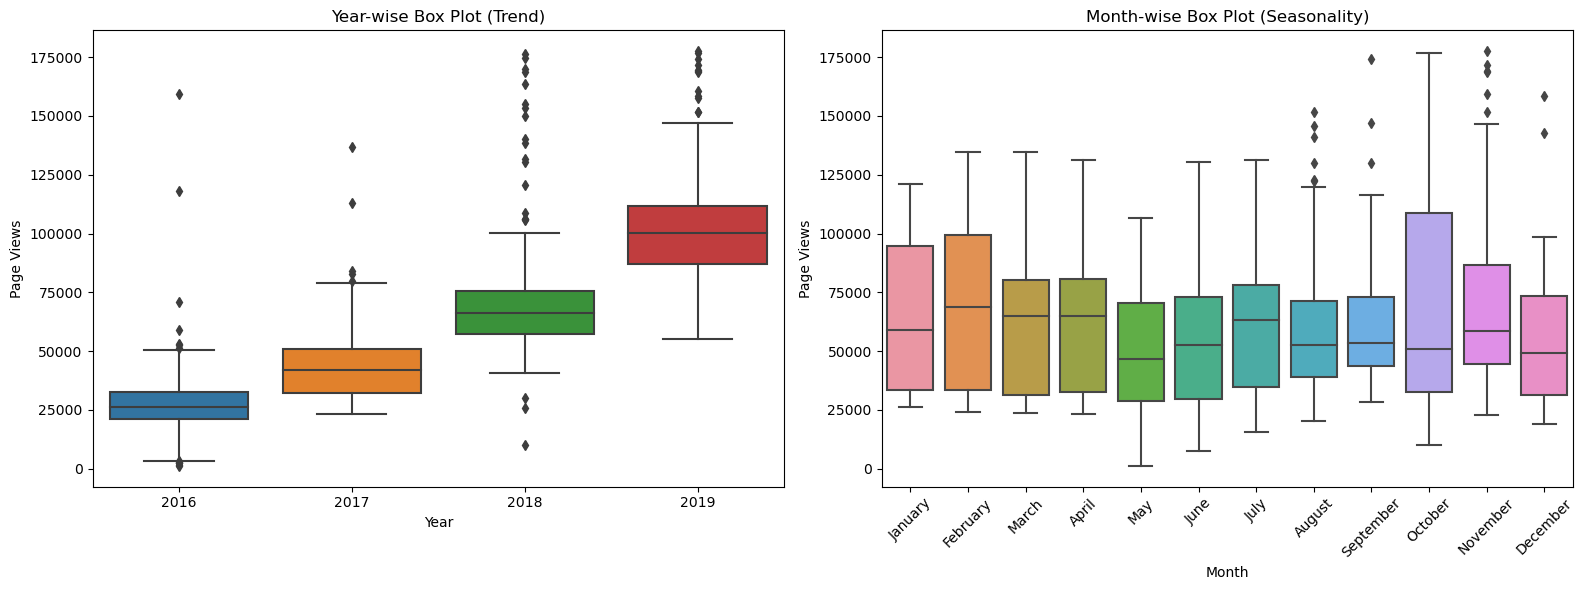

In [17]:
def draw_box_plot(df):
    # Extract year and month from the 'date' column
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month_name()

    # Set the order of months for plotting
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Year-wise box plot
    sns.boxplot(x='year', y='value', data=df, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise box plot
    sns.boxplot(x='month', y='value', data=df, ax=axes[1], order=month_order)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Rotate the x-axis labels for month-wise box plot
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Test the function
draw_box_plot(df)
